# Introduction

This notebook is an implementation of Jón Daníelsson's _Financial Risk Forecasting_ (Wiley, 2011) in Python 3.9.12, with annotations and introductory examples. The introductory examples (Appendix) are similar to Appendix B/C in the original book, with an emphasis on the differences between R/MATLAB and Python.

Bullet point numbers correspond to the R/MATLAB Listing numbers in the original book, referred to henceforth as _FRF_.

More details can be found at the book website: https://www.financialriskforecasting.com/

Last updated: June 2022

Copyright 2011-2020 Jón Daníelsson. This code is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version. This code is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. The GNU General Public License is available at: https://www.gnu.org/licenses/.

<a id='top'></a>
## Table of Contents 
[Chapter 0. Appendix - Introduction](#0) <br>
[Chapter 1. Financial Markets, Prices and Risk](#1) <br>
[Chapter 2. Univariate Volatility Modeling](#2) <br>
[Chapter 3. Multivariate Volatility Models](#3) <br>
[Chapter 4. Risk Measures](#4) <br>
[Chapter 5. Implementing Risk Forecasts](#5) <br>
[Chapter 6. Analytical Value-at-Risk for Options and Bonds](#6) <br>
[Chapter 7. Simulation Methods for VaR for Options and Bonds](#7) <br>
[Chapter 8. Backtesting and Stress Testing](#8) <br>
[Chapter 9. Extreme Value Theory](#9) <br>

<a id='0'></a>
***

# Appendix: An Introduction to Python

Created in Python 3.9.12 (June 2022)

-  P.1: Entering and Printing Data
-  P.2: Vectors, Matrices and Sequences
-  P.3: Importing Data (to be updated)
-  P.4: Basic Summary Statistics
-  P.5: Calculating Moments
-  P.6: Basic Matrix Operations
-  P.7: Statistical Distributions
-  P.8: Statistical Tests
-  P.9: Time Series
-  P.10: Loops and Functions
-  P.11: Basic Graphs
-  P.12: Miscellaneous Useful Functions

In [1]:
# Entering and Printing Data in Python
# Listing P.1
# Last updated June 2018
#
#

x = 10             # assign x the value 10
print(x)           # print the value of x

10


In [2]:
# Vectors, Matrices and Sequences in Python
# Listing P.2
# Last updated July 2020
#
#

y = [1,3,5,7,9]       # lists in square brackets are stored as arrays

print(y)

print(y[2])           # 3rd element (Python indices start at 0)

print(len(y))         # as expected, y has length 5

import numpy as np    # NumPy: Numeric Python package

v = np.full([2,3], np.nan) # create a 2x3 matrix with NaN values

print(v)           

print(v.shape)        # as expected, v is size (2,3)

w = np.tile([1,2,3], (3,2)) # repeats thrice by rows, twice by columns

print(w)

s = range(10)         # an iterator from 0 to 9

print([x for x in s]) # return  elements using list comprehension

[1, 3, 5, 7, 9]
5
5
[[nan nan nan]
 [nan nan nan]]
(2, 3)
[[1 2 3 1 2 3]
 [1 2 3 1 2 3]
 [1 2 3 1 2 3]]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [3]:
# Basic Summary Statistics in Python
# Listing P.3
# Last updated July 2020
#
#

import numpy as np

y = [3.14, 15, 9.26, 5]

print(sum(y))          # sum of all elements of y
print(max(y))          # maximum value of y
print(min(y))          # minimum value of y
print(np.mean(y))      # arithmetic mean
print(np.median(y))    # median
print(np.var(y))       # population variance
print(np.cov(y))       # covar matrix = sample variance for single vector
print(np.corrcoef(y))  # corr matrix = [1] for single vector
print(np.sort(y))      # sort in ascending order
print(np.log(y))       # natural log

32.4
15
3.14
8.1
7.13
20.791800000000002
27.722399999999997
1.0
[ 3.14  5.    9.26 15.  ]
[1.1442228  2.7080502  2.22570405 1.60943791]


In [4]:
# Calculating Moments in Python
# Listing P.4
# Last updated June 2018
#
#

from scipy import stats

print(np.mean(y))                        # mean
print(np.var(y))                         # variance
print(np.std(y, ddof = 1))               # ddof = 1 for unbiased standard deviation
print(stats.skew(y))                     # skewness
print(stats.kurtosis(y, fisher = False)) # fisher = False gives Pearson definition

8.1
20.791800000000002
5.265206548655049
0.47004939528995604
1.7153138938095185


In [5]:
# Basic Matrix Operations in Python
# Listing P.5
# Last updated June 2018
#
#


z = np.matrix([[1, 2], [3, 4]])                   # z is a 2 x 2 matrix
x = np.matrix([1, 2])                             # x is a 1 x 2 matrix

## Note: z * x is undefined since the two matrices are not conformable

print(z * np.transpose(x))                        # this evaluates to a 2 x 1 matrix          

b = np.concatenate((z,x), axis = 0)               # "stacking" z and x vertically

print(b)

c = np.concatenate((z,np.transpose(x)), axis = 1) # "stacking" z and x horizontally

print(c)

## note: dimensions must match along the combining axis

[[ 5]
 [11]]
[[1 2]
 [3 4]
 [1 2]]
[[1 2 1]
 [3 4 2]]


In [6]:
# Statistical Distributions in Python
# Listing P.6
# Last updated July 2020
#
#


q = np.arange(-3,4,1)        # specify a set of values, syntax arange(min, exclusive-max, step)

p = np.arange(0.1,1.0,0.1)   # specify a set of probabilities

print(stats.norm.ppf(p))     # element-wise inverse Normal quantile

print(stats.t.cdf(q,4))      # element-wise cdf under Student-t(4)

print(stats.chi2.pdf(q,2))   # element-wise pdf under Chisq(2)

## One can also obtain pseudorandom samples from distributions using numpy.random

x = np.random.standard_t(df=5, size=100)   # Sampling 100 times from TDist with 5 df

y = np.random.normal(size=50)              # Sampling 50 times from a standard normal 

## Given data, we obtain MLE estimates of parameters with stats:

res = stats.norm.fit(x)                    # Fitting x to normal dist

print(res)                                 # First element is mean, second sd

[-1.28155157 -0.84162123 -0.52440051 -0.2533471   0.          0.2533471
  0.52440051  0.84162123  1.28155157]
[0.01997098 0.05805826 0.18695048 0.5        0.81304952 0.94194174
 0.98002902]
[0.         0.         0.         0.5        0.30326533 0.18393972
 0.11156508]
(-0.045879161987809274, 1.4544560879442023)


In [7]:
# Statistical Tests in Python
# Listing P.7
# Last updated July 2020
#
#

from statsmodels.stats.diagnostic import acorr_ljungbox

x = np.random.standard_t(df=5, size=500)  # Create dataset x

print(stats.jarque_bera(x))               # Jarque-Bera test - prints statistic and p-value
print(acorr_ljungbox(x, lags=20))         # Ljung-Box test - prints array of statistics and p-values

Jarque_beraResult(statistic=3.8010576599080963, pvalue=0.14948954376718215)
      lb_stat  lb_pvalue
1    1.678898   0.195071
2    1.735300   0.419937
3    3.187289   0.363640
4    3.200164   0.524904
5    3.589705   0.609860
6    3.620324   0.727898
7    4.015758   0.777961
8    4.489716   0.810461
9    6.731188   0.665084
10   8.994699   0.532607
11   9.408528   0.584238
12  10.445726   0.576919
13  10.545396   0.648842
14  10.546561   0.721232
15  12.563387   0.635981
16  16.422652   0.423872
17  16.471006   0.490724
18  16.669928   0.545898
19  18.047904   0.519241
20  20.970627   0.398863


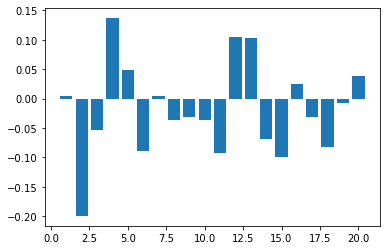

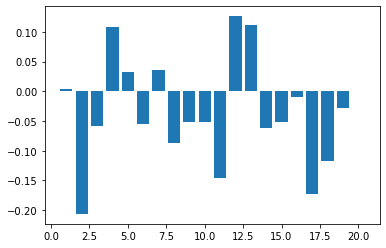

In [8]:
# Time Series in Python
# Listing P.8
# Last updated June 2018
#
#

import statsmodels.api as sm
import matplotlib.pyplot as plt

y = np.random.standard_t(df = 5, size = 60)   # Create hypothetical dataset y

q1 = sm.tsa.stattools.acf(y, nlags=20)        # autocorrelation for lags 1:20
plt.bar(x = np.arange(1,len(q1)), height = q1[1:])
plt.show()
plt.close()

q2 = sm.tsa.stattools.pacf(y, nlags=20)       # partial autocorr for lags 1:20
plt.bar(x = np.arange(1,len(q2)), height = q2[1:])
plt.show()
plt.close()

In [9]:
# Loops and Functions in Python
# Listing P.9
# Last updated June 2018
#
#


## For loops

for i in range(3,8):      # NOTE: range(start, end), end excluded
    print(i**2)           # range(3,8) iterates through [3,4,5,6,7)

## If-else loops

X = 10

if X % 3 == 0:
    print("X is a multiple of 3")
else:
    print("X is not a multiple of 3")

## Functions (example: a simple excess kurtosis function)

def excess_kurtosis(x, excess = 3):        # note: excess optional, default = 3
    m4=np.mean((x-np.mean(x))**4)          # note: exponentiation in Python uses **
    excess_kurt=m4/(np.std(x)**4)-excess
    return excess_kurt

x = np.random.standard_t(df=5,size=60)     # Create hypothetical dataset x

print(excess_kurtosis(x))

9
16
25
36
49
X is not a multiple of 3
0.3836589450732917


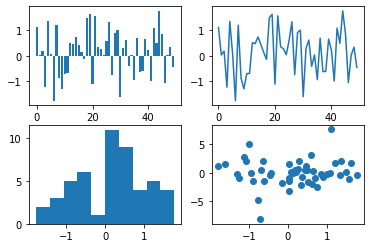

In [10]:
# Basic Graphs in Python
# Listing P.10
# Last updated July 2020
#
#


y = np.random.normal(size = 50)
z = np.random.standard_t(df = 4, size = 50)

## using Matplotlib to plot bar, line, histogram and scatter plots
## subplot(a,b,c) creates a axb grid and plots the next plot in position c

plt.subplot(2,2,1)
plt.bar(range(len(y)), y);
plt.subplot(2,2,2)
plt.plot(y);
plt.subplot(2,2,3)
plt.hist(y);
plt.subplot(2,2,4)
plt.scatter(y,z);

In [11]:
# Miscellaneous Useful Functions in Python
# Listing P.11
# Last updated June 2018
#
#

## Convert objects from one type to another with int(), float() etc
## To check type, use type(object)

x = 8.0

print(type(x))

x = int(x)

print(type(x))

<class 'float'>
<class 'int'>


<a id='1'></a>
***

# Chapter 1: Financial Markets, Prices and Risk

-  1.1/1.2: Loading hypothetical stock prices, converting to returns, plotting returns
-  1.3/1.4: Summary statistics for returns timeseries
-  1.5/1.6: Autocorrelation function (ACF) plots, Ljung-Box test
-  1.7/1.8: Quantile-Quantile (QQ) plots
-  1.9/1.10: Correlation matrix between different stocks

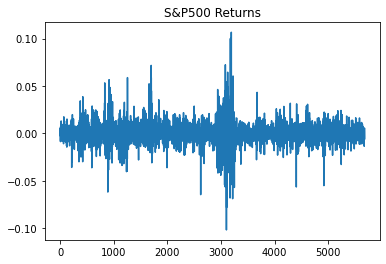

In [12]:
# Download S&P500 data in Python
# Listing 1.1/1.2
# Last updated July 2020
# 
#

import numpy as np
import matplotlib.pyplot as plt

price = np.loadtxt('index.csv', delimiter = ',', skiprows = 1)

y = np.diff(np.log(price), n=1, axis=0)

plt.plot(y)
plt.title("S&P500 Returns")
plt.show()
plt.close()

In [13]:
# Sample statistics in Python
# Listing 1.3/1.4
# Last updated July 2020
# 
#

from scipy import stats

print (np.mean(y))
print (np.std(y, ddof=1))
print (np.min(y))
print (np.max(y))
print (stats.skew(y))
print (stats.kurtosis(y, fisher = False))
print (stats.jarque_bera(y))

0.00025815990082599837
0.010005728643763066
-0.10195548627302298
0.10673589502911707
0.1526332698963366
16.981171461092003
Jarque_beraResult(statistic=46251.44013954825, pvalue=0.0)


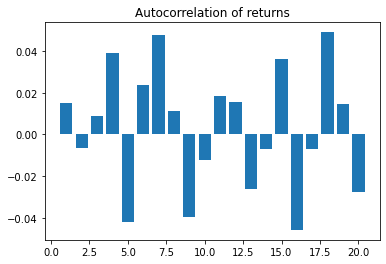

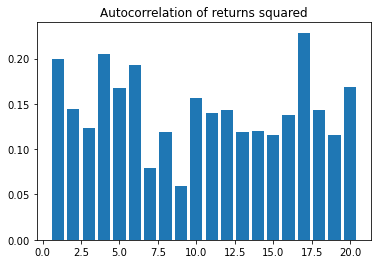

      lb_stat     lb_pvalue
1    1.246528  2.642166e-01
2    1.496305  4.732401e-01
3    1.954356  5.819341e-01
4   10.568621  3.186477e-02
5   20.603885  9.621816e-04
6   23.745683  5.815970e-04
7   36.587087  5.615488e-06
8   37.313407  1.007743e-05
9   46.301167  5.294369e-07
10  47.172281  8.785189e-07
11  49.061384  9.224809e-07
12  50.401496  1.187518e-06
13  54.260693  5.445471e-07
14  54.559431  1.030404e-06
15  62.017528  1.131049e-07
16  73.970415  1.992008e-09
17  74.263010  3.930393e-09
18  87.933280  3.386148e-11
19  89.148138  4.694050e-11
20  93.488126  1.808801e-11
        lb_stat      lb_pvalue
1    225.318034   6.258153e-51
2    344.090460   1.912960e-75
3    430.941781   4.388691e-93
4    669.009996  1.786587e-143
5    827.745178  1.149887e-176
6   1040.356737  1.668589e-221
7   1075.998715  4.541978e-228
8   1157.115714  1.764649e-244
9   1176.923181  1.162342e-247
10  1315.830953  1.465726e-276
11  1426.796212  1.990767e-299
12  1543.177596   0.000000e+00
13  1624.

In [14]:
# ACF plots and the Ljung-Box test in Python
# Listing 1.5/1.6
# Last updated July 2020
# 
#

import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox


q = sm.tsa.stattools.acf(y, nlags=20)
plt.bar(x = np.arange(1,len(q)), height = q[1:])
plt.title("Autocorrelation of returns")
plt.show()
plt.close()

q = sm.tsa.stattools.acf(np.square(y), nlags=20)
plt.bar(x = np.arange(1,len(q)), height = q[1:])
plt.title("Autocorrelation of returns squared")
plt.show()
plt.close()


print (acorr_ljungbox(y, lags=20))
print (acorr_ljungbox(np.square(y), lags=20))

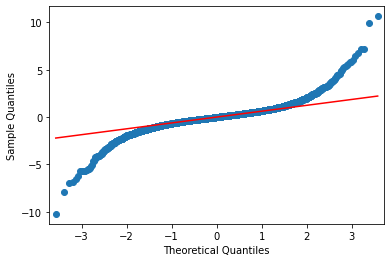

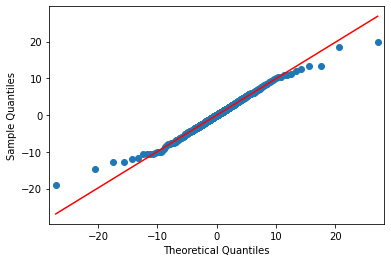

In [15]:
# QQ plots in Python
# Listing 1.7/1.8
# Last updated June 2018
# 
#

from statsmodels.graphics.gofplots import qqplot

fig1 = qqplot(y, line='q', dist = stats.norm, fit = True)               
plt.show()
plt.close()

fig2 = qqplot(y, line='q', dist = stats.t, distargs=(5,), fit = True)
plt.show()
plt.close()

In [16]:
# Download stock prices in Python
# Listing 1.9/1.10
# Last updated July 2020
# 
#


p = np.loadtxt('stocks.csv',delimiter=',',skiprows = 1)
    
y = np.diff(np.log(p), n=1, axis=0)

print(np.corrcoef(y, rowvar=False)) # correlation matrix

## rowvar=False indicates that columns are variables

[[1.         0.22968419 0.21261918]
 [0.22968419 1.         0.14505109]
 [0.21261918 0.14505109 1.        ]]


<a id='2'></a>
***

# Chapter 2: Univariate Volatility Modelling

-  2.1/2.2: GARCH and t-GARCH estimation
-  2.3/2.4: APARCH estimation (unavailable as of June 2018)

In [17]:
# START
# ARCH and GARCH estimation in Python
# Listing 2.1/2.2
# Last updated July 2020
# 
#

import numpy as np

p = np.loadtxt('index.csv', delimiter = ',', skiprows = 1)

y = np.diff(np.log(p), n=1, axis=0)*100

y = y-np.mean(y)

from arch import arch_model   
## using Kevin Sheppard's ARCH package for Python

## ARCH(1)
am = arch_model(y, mean = 'Zero', vol='Garch', p=1, o=0, q=0, dist='Normal')
arch1 = am.fit(update_freq=5, disp = "off")

## ARCH(4)
am = arch_model(y, mean = 'Zero', vol='Garch', p=4, o=0, q=0, dist='Normal')
arch4 = am.fit(update_freq=5, disp = "off")


## GARCH(4,1)
am = arch_model(y, mean = 'Zero', vol='Garch', p=4, o=0, q=1, dist='Normal')
garch4_1 = am.fit(update_freq=5, disp = "off")

## GARCH(1,1)
am = arch_model(y, mean = 'Zero', vol='Garch', p=1, o=0, q=1, dist='Normal')
garch1_1 = am.fit(update_freq=5, disp = "off")

## t-GARCH(1,1)
am = arch_model(y, mean = 'Zero', vol='Garch', p=1, o=0, q=1, dist='StudentsT')
tgarch1_1 = am.fit(update_freq=5, disp = "off")

print("ARCH(1) model:", "\n", arch1.summary(), "\n")
print("ARCH(4) model:", "\n", arch4.summary(), "\n")
print("GARCH(4,1) model:", "\n", garch4_1.summary(), "\n")
print("GARCH(1,1) model:", "\n", garch1_1.summary(), "\n")
print("tGARCH(1,1) model:", "\n", tgarch1_1.summary(), "\n")

ARCH(1) model: 
                         Zero Mean - ARCH Model Results                        
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7670.48
Distribution:                  Normal   AIC:                           15345.0
Method:            Maximum Likelihood   BIC:                           15358.3
                                        No. Observations:                 5676
Date:                Mon, Jun 20 2022   Df Residuals:                     5676
Time:                        14:42:01   Df Model:                            0
                            Volatility Model                            
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.6846  4.051e-02     16.900  4.511e-6

In [18]:
# Advanced ARCH and GARCH estimation in Python
# Listing 2.3/2.4
# Last updated July 2020
# 
#
  

## Leverage effects
am = arch_model(y, mean = 'Zero', vol='Garch', p=1, o=1, q=1, dist='Normal')
leverage_garch1_1 = am.fit(update_freq=5, disp = "off")

## Power models, delta = 1
am = arch_model(y, mean = 'Zero', vol='Garch', p=1, o=0, q=1, dist='Normal', power = 1.0)
power_garch1_1 = am.fit(update_freq=5, disp = "off")

print("Leverage effects:", "\n", leverage_garch1_1.summary(), "\n")
print("Power model:", "\n", power_garch1_1.summary(), "\n")

Leverage effects: 
                      Zero Mean - GJR-GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -6965.83
Distribution:                  Normal   AIC:                           13939.7
Method:            Maximum Likelihood   BIC:                           13966.2
                                        No. Observations:                 5676
Date:                Mon, Jun 20 2022   Df Residuals:                     5676
Time:                        14:42:02   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0128  3.349e-03   

<a id='3'></a>
***

# Chapter 3: Multivariate Volatility Models

-  3.1/3.2: Loading hypothetical stock prices
-  3.3/3.4: EWMA estimation
-  3.5/3.6: OGARCH estimation (unavailable as of June 2018)
-  3.7/3.8: DCC estimation (unavailable as of June 2018)
-  3.9/3.10: Comparison of EWMA, OGARCH, DCC (unavailable as of June 2018)

In [19]:
# Download stock prices in Python
# Listing 3.1/3.2
# Last updated June 2018
# 
#

import numpy as np

p = np.loadtxt('stocks.csv',delimiter=',',skiprows=1)
p = p[:,[0,1]]                          # consider first two stocks

y = np.diff(np.log(p), n=1, axis=0)*100 # calculate returns

y[:,0] = y[:,0]-np.mean(y[:,0])         # subtract mean
y[:,1] = y[:,1]-np.mean(y[:,1])

T = len(y[:,0])

In [20]:
# EWMA in Python
# Listing 3.3/3.4
# Last updated June 2018
# 
#

EWMA = np.full([T,3], np.nan)

lmbda = 0.94

S = np.cov(y, rowvar = False)

EWMA[0,] = S.flatten()[[0,3,1]]

for i in range(1,T):
    S = lmbda * S + (1-lmbda) * np.transpose(np.asmatrix(y[i-1]))* np.asmatrix(y[i-1])
    EWMA[i,] = [S[0,0], S[1,1], S[0,1]]

EWMArho = np.divide(EWMA[:,2], np.sqrt(np.multiply(EWMA[:,0],EWMA[:,1])))

print(EWMArho)

[0.22968419 0.22363473 0.22182769 ... 0.34366321 0.31227409 0.31597027]


In [21]:
# OGARCH in Python
# Listing 3.5/3.6
# Last updated July 2020
# 
#

## Python does not have a proper OGARCH package at present

In [22]:
# DCC in Python
# Listing 3.7/3.8
# Last updated July 2020
# 
#

## Python does not have a proper DCC package at present

In [23]:
# Correlation comparison in Python
# Listing 3.9/3.10
# Last updated July 2020
# 
#

## Python does not have a proper OGARCH/DCC package at present

<a id='4'></a>
***

# Chapter 4: Risk Measures

-  4.1/4.2: Expected Shortfall (ES) estimation under normality assumption

In [24]:
# ES in Python
# Listing 4.1/4.2
# Last updated July 2020
# 
#

from scipy import stats

p = [0.5, 0.1, 0.05, 0.025, 0.01, 0.001]
VaR = -stats.norm.ppf(p)
ES = stats.norm.pdf(stats.norm.ppf(p))/p

for i in range(len(p)):
    print("VaR " + str(round(p[i]*100,3)) + "%: " + str(round(VaR[i],3)))
    print("ES " + str(round(p[i]*100,3)) + "%: " + str(round(ES[i],3)), "\n")

VaR 50.0%: -0.0
ES 50.0%: 0.798 

VaR 10.0%: 1.282
ES 10.0%: 1.755 

VaR 5.0%: 1.645
ES 5.0%: 2.063 

VaR 2.5%: 1.96
ES 2.5%: 2.338 

VaR 1.0%: 2.326
ES 1.0%: 2.665 

VaR 0.1%: 3.09
ES 0.1%: 3.367 



<a id='5'></a>
***

# Chapter 5: Implementing Risk Forecasts

-  5.1/5.2: Loading hypothetical stock prices, converting to returns
-  5.3/5.4: Univariate HS Value at Risk (VaR)
-  5.5/5.6: Multivariate HS VaR
-  5.7/5.8: Univariate ES VaR
-  5.9/5.10: Normal VaR
-  5.11/5.12: Portfolio Normal VaR
-  5.13/5.14: Student-t VaR
-  5.15/5.16: Normal ES VaR
-  5.17/5.18: Direct Integration Normal ES VaR
-  5.19/5.20: MA Normal VaR
-  5.21/5.22: EWMA VaR
-  5.23/5.24: Two-asset EWMA VaR
-  5.25/5.26: GARCH(1,1) VaR

In [25]:
# Download stock prices in Python
# Listing 5.1/5.2
# Last updated July 2020
# 
# 

import numpy as np
from scipy import stats

p = np.loadtxt('stocks.csv',delimiter=',',skiprows=1)
p = p[:,[0,1]]      # consider two stocks
## convert prices to returns, and adjust length

y1 = np.diff(np.log(p[:,0]), n=1, axis=0)
y2 = np.diff(np.log(p[:,1]), n=1, axis=0)

y = np.stack([y1,y2], axis = 1)
T = len(y1)
value = 1000 # portfolio value
p = 0.01 # probability

In [26]:
# Univariate HS in Python
# Listing 5.3/5.4
# Last updated July 2020
# 
# 

from math import ceil

ys = np.sort(y1) # sort returns
op = ceil(T*p)    # p percent smallest
VaR1 = -ys[op - 1] * value

print(VaR1)

17.498224747930724


In [27]:
# Multivariate HS in Python
# Listing 5.5/5.6
# Last updated July 2020
# 
# 

w = [0.3, 0.7]               # vector of portfolio weights
yp = np.squeeze(np.matmul(y, w)) # portfolio returns
yps = np.sort(yp)
VaR2= -yps[op - 1] * value

print(VaR2)

18.726262569293546


In [28]:
# Univariate ES in Python
# Listing 5.7/5.8
# Last updated June 2018
# 
# 

ES1 = -np.mean(ys[:op]) * value

print(ES1)

22.56338810381287


In [29]:
# Normal VaR in Python
# Listing 5.9/5.10
# Last updated June 2018
# 
#

sigma = np.std(y1, ddof=1) # estimate volatility
VaR3 = -sigma * stats.norm.ppf(p) * value 

print(VaR3)

14.94957154354662


In [30]:
# Portfolio normal VaR in Python
# Listing 5.11/5.12
# Last updated June 2022
# 
# 

## portfolio volatility
sigma = np.sqrt(np.mat(w)*np.mat(np.cov(y,rowvar=False))*np.transpose(np.mat(w)))[0,0]
    
## Note: [0,0] is to pull the first element of the matrix out as a float
VaR4 = -sigma * stats.norm.ppf(p) * value 

print(VaR4)

17.041085456523806


In [31]:
# Student-t VaR in Python
# Listing 5.13/5.14
# Last updated June 2018
# 
# 

scy1 = y1 * 100         # scale the returns
res = stats.t.fit(scy1)

sigma = res[2]/100      # rescale volatility
nu = res[0]

VaR5 = -sigma*stats.t.ppf(p,nu)*value

print(VaR5)

17.123433115229002


In [32]:
# Normal ES in Python
# Listing 5.15/5.16
# Last updated June 2018
# 
# 

sigma = np.std(y1, ddof=1)
ES2 = sigma * stats.norm.pdf(stats.norm.ppf(p)) / p * value

print(ES2)

17.127193705870486


In [33]:
# Direct integration ES in Python
# Listing 5.17/5.18
# Last updated June 2018
# 
# 

from scipy.integrate import quad

VaR = -stats.norm.ppf(p)
integrand = lambda q: q * stats.norm.pdf(q)
ES = -sigma * quad(integrand, -np.inf, -VaR)[0] / p * value

print(ES)

17.12719370586835


In [34]:
# MA normal VaR in Python
# Listing 5.19/5.20
# Last updated June 2018
# 
#

WE = 20
for t in range(T-5,T+1):
    t1 = t-WE
    window = y1[t1:t]      # estimation window
    sigma = np.std(window, ddof=1)
    VaR6 = -sigma*stats.norm.ppf(p)*value
    print (VaR6)

16.05049679536141
16.149103169475975
18.854346063820373
18.882124798913356
16.230531751938656
16.169762107305665


In [35]:
# EWMA VaR in Python
# Listing 5.21/5.22
# Last updated June 2018
# 
#

lmbda = 0.94
s11 = np.var(y1[0:30], ddof = 1)     # initial variance

for t in range(1, T):
    s11 = lmbda*s11 + (1-lmbda)*y1[t-1]**2

VaR7 = -np.sqrt(s11)*stats.norm.ppf(p)*value

print(VaR7)

16.75344387500228


In [36]:
# Two-asset EWMA VaR in Python
# Listing 5.23/5.24
# Last updated June 2022
# 
# 

## s is the initial covariance
s = np.cov(y, rowvar = False)
for t in range(1,T):
    s = lmbda*s+(1-lmbda)*np.transpose(np.asmatrix(y[t-1,:]))*np.asmatrix(y[t-1,:])

sigma = np.sqrt(np.mat(w)*s*np.transpose(np.mat(w)))[0,0]
## Note: [0,0] is to pull the first element of the matrix out as a float

VaR8 = -sigma * stats.norm.ppf(p) * value

print(VaR8)

20.50363287336398


In [37]:
# GARCH VaR in Python
# Listing 5.25/5.26
# Last updated July 2020
# 
# 

from arch import arch_model 

am = arch_model(y1, mean = 'Zero', vol='Garch', p=1, o=0, q=1, dist='Normal', rescale = False)
res = am.fit(update_freq=5, disp = "off")
omega = res.params.loc['omega']
alpha = res.params.loc['alpha[1]']
beta = res.params.loc['beta[1]']
## computing sigma2 for t+1
sigma2 = omega + alpha*y1[T-1]**2 + beta * res.conditional_volatility[-1]**2

VaR9 = -np.sqrt(sigma2) * stats.norm.ppf(p) * value

print(VaR9)

16.54281744634769


<a id='6'></a>
***

# Chapter 6: Analytical Value-at-Risk for Options and Bonds

-  6.1/6.2: Black-Scholes function definition
-  6.3/6.4: Black-Scholes option price calculation example

In [38]:
# Black-Scholes function in Python
# Listing 6.1/6.2
# Last updated June 2018
# 
# 

import numpy as np
from scipy import stats

def bs(X, P, r, sigma, T):
    d1 = (np.log(P/X) + (r + 0.5 * sigma**2)*T)/(sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    Call = P * stats.norm.cdf(d1) - X * np.exp(-r * T) * stats.norm.cdf(d2)
    Put = X * np.exp(-r * T) * stats.norm.cdf(-d2) - P * stats.norm.cdf(-d1)
    
    Delta_Call = stats.norm.cdf(d1)
    Delta_Put = Delta_Call - 1
    Gamma = stats.norm.pdf(d1) / (P * sigma * np.sqrt(T))
    
    return {"Call": Call, "Put": Put, "Delta_Call": Delta_Call, "Delta_Put": Delta_Put, "Gamma": Gamma}

In [39]:
# Black-Scholes in Python
# Listing 6.3/6.4
# Last updated July 2020
# 
# 

f = bs(X = 90, P = 100, r = 0.05, sigma = 0.2, T = 0.5)

print(f)

{'Call': 13.498517482637212, 'Put': 1.2764095651871656, 'Delta_Call': 0.8395228492806657, 'Delta_Put': -0.16047715071933433, 'Gamma': 0.017238257785615545}


<a id='7'></a>
***

# Chapter 7: Simulation Methods for VaR for Options and Bonds

-  7.1/7.2: Plotting normal distribution transformation
-  7.3/7.4: Random number generation from Uniform(0,1), Normal(0,1)
-  7.5/7.6: Bond pricing using yield curve
-  7.7/7.8: Yield curve simulations
-  7.9/7.10: Bond price simulations
-  7.11/7.12: Black-Scholes analytical pricing of call
-  7.13/7.14: Black-Scholes Monte Carlo simulation pricing of call
-  7.15/7.16: Option density plots
-  7.17/7.18: VaR simulation of portfolio with only underlying
-  7.19/7.20: VaR simulation of portfolio with only call
-  7.21/7.22: VaR simulation of portfolio with call, put and underlying
-  7.23/7.24: Simulated two-asset returns
-  7.25/7.26: Two-asset portfolio VaR
-  7.27/7.28: Two-asset portfolio VaR with a call

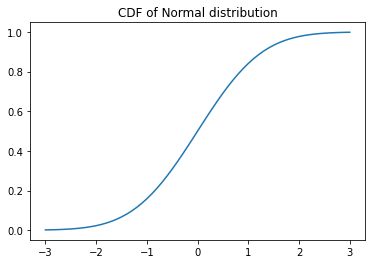

In [40]:
# Transformation in Python
# Listing 7.1/7.2
# Last updated July 2020
# 
#

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-3,3.1, step = 0.1) # Python's arange excludes the last value
plt.plot(x, stats.norm.cdf(x))
plt.title("CDF of Normal distribution")
plt.show()
plt.close()

In [41]:
# Various RNs in Python
# Listing 7.3/7.4
# Last updated July 2020
# 
# 


np.random.seed(12)     # set seed
S = 10                 # simulation size

print (np.random.uniform(size = S))
print (np.random.normal(size = S))
print (np.random.standard_t(df = 4,size = S))

[0.15416284 0.7400497  0.26331502 0.53373939 0.01457496 0.91874701
 0.90071485 0.03342143 0.95694934 0.13720932]
[ 0.75314283 -1.53472134  0.00512708 -0.12022767 -0.80698188  2.87181939
 -0.59782292  0.47245699  1.09595612 -1.2151688 ]
[ 1.54289086  0.69652904  0.52148112 -0.25218158 -4.66442107 -2.42642183
  0.27546574 -2.17082333  1.29967088  1.7842616 ]


In [42]:
# Price bond in Python
# Listing 7.5/7.6
# Last updated July 2020
# 
# 


yield_c = [5.00, 5.69, 6.09, 6.38, 6.61, 
           6.79, 6.94, 7.07, 7.19, 7.30]    # yield curve

T = len(yield_c)
r = 0.07                                    # initial yield rate
Par = 10                                    # par value
coupon = r * Par                            # coupon payments 
cc = [coupon] * 10                          # vector of cash flows
cc[T-1] += Par                              # add par to cash flows
P=np.sum(cc/(np.power((1+np.divide(yield_c,100)),
                      list(range(1,T+1))))) # calc price

print(P)

9.913205732444842


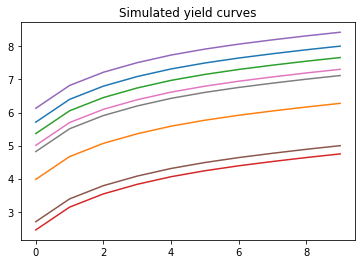

In [43]:
# Simulate yields in Python
# Listing 7.7/7.8
# Last updated July 2020
# 
# 


np.random.seed(12)                   # set seed
sigma = 1.5                          # daily yield volatility
S = 8                                # number of simulations
r = np.random.normal(0,sigma,size=S) # generate random numbers

ysim = np.zeros([T,S])
for i in range(S):
    ysim[:,i] = yield_c + r[i]

plt.plot(ysim)
plt.title("Simulated yield curves")
plt.show()
plt.close()

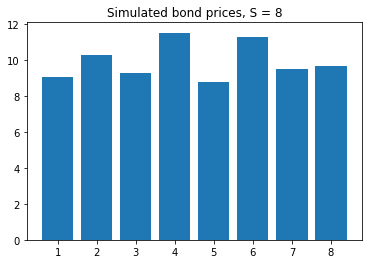

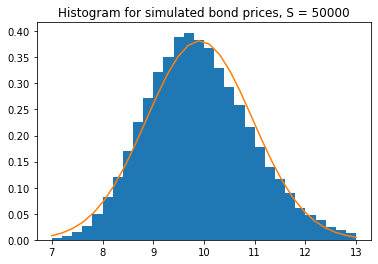

In [44]:
# Simulate bond prices in Python
# Listing 7.9/7.10
# Last updated November 2020
# 
# 


S = 8                   # simulation size
SP = np.zeros([S])      # initializing vector with zeros

for i in range(S):      # S simulations
    SP[i] = np.sum(cc/(np.power((1+ysim[:,i]/100), list(range(1,T+1)))))

SP -= (np.mean(SP) - P) # correct for mean

plt.bar(range(1,S+1), SP)
plt.title("Simulated bond prices, S = 8")
plt.show()
plt.close()

S = 50000

np.random.seed(12)
r = np.random.normal(0, sigma, size = S)

ysim = np.zeros([T,S])
for i in range(S):
    ysim[:,i] = yield_c + r[i]

SP = np.zeros([S])

for i in range(S):     
    SP[i] = np.sum(cc/(np.power((1+ysim[:,i]/100), list(range(1,T+1)))))
    
SP -= (np.mean(SP) - P)

plt.hist(SP, bins = 30, range = (7, 13), density = True)

fitted_norm=stats.norm.pdf(np.linspace(7,13,30),
                           np.mean(SP),np.std(SP,ddof=1))

plt.plot(np.linspace(7,13,30), fitted_norm)
plt.title("Histogram for simulated bond prices, S = 50000")
plt.show()
plt.close()

In [45]:
# Black-Scholes valuation in Python
# Listing 7.11/7.12
# Last updated July 2020
# 
# 

## This calculation uses the Black-Scholes pricing function (Listing 6.1/6.2)
P0 = 50                     # initial spot price
sigma = 0.2                 # annual volatility
r = 0.05                    # annual interest
T = 0.5                     # time to expiration
X = 40                      # strike price
f = bs(X, P0, r, sigma, T)  # analytical call price

print(f)

{'Call': 11.087280700718757, 'Put': 0.09967718185206187, 'Delta_Call': 0.9660259272621473, 'Delta_Put': -0.03397407273785269, 'Gamma': 0.010663779610020534}


In [46]:
# Black-Scholes simulation in Python
# Listing 7.13/7.14
# Last updated July 2020
# 
#


np.random.seed(12)          # set seed
S = 10**6                   # number of simulations
ysim=np.random.normal(-0.5*sigma**2*T,
                      sigma*np.sqrt(T),size=S) # sim returns, lognorm corrected
F = P0 * np.exp(r * T) * np.exp(ysim)          # sim future prices
SP = F - X                  # payoff
SP[SP < 0] = 0              # set negative outcomes to zero
fsim = SP * np.exp(-r * T)  # discount
call_sim = np.mean(fsim)    # simulated price
print(call_sim)

11.068936888001415


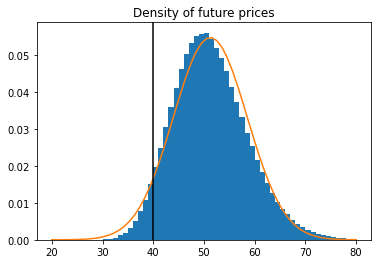

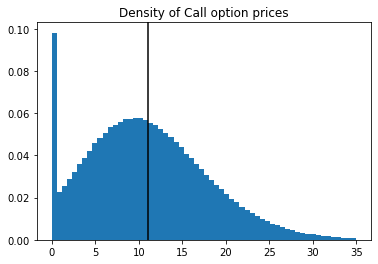

In [47]:
# Option density plots in Python
# Listing 7.15/7.16
# Last updated July 2020
# 
# 


plt.hist(F, bins = 60, range = (20,80), density = True)
fitted_norm=stats.norm.pdf(np.linspace(20,80,60),np.mean(F),np.std(F,ddof=1))
plt.plot(np.linspace(20,80,60), fitted_norm)
plt.axvline(x=X, color='k')    
plt.title("Density of future prices")
plt.show()
plt.close()

plt.hist(fsim, bins = 60, range = (0, 35), density = True)
plt.axvline(x=f['Call'], color='k')
plt.title("Density of Call option prices")
plt.show()
plt.close()

In [48]:
# Simulate VaR in Python
# Listing 7.17/7.18
# Last updated July 2020
# 
#

from math import ceil

np.random.seed(1)       # set seed
S = 10**7               # number of simulations
s2 = 0.01**2            # daily variance
p = 0.01                # probability
r = 0.05                # annual riskfree rate
P = 100                 # price today
ysim=np.random.normal(r/365-0.5*s2,np.sqrt(s2),size=S) # sim returns
Psim = P * np.exp(ysim) # sim future prices
q = np.sort(Psim - P)   # simulated P/L
VaR1 = -q[ceil(p*S) - 1]

print(VaR1)

2.290784802622909


In [49]:
# Simulate option VaR in Python
# Listing 7.19/7.20
# Last updated July 2020
# 
# 



T = 0.25       # time to expiration
X = 100                                 # strike price
sigma = np.sqrt(s2 * 250)               # annual volatility
f = bs(X, P, r, sigma, T)               # analytical call price
fsim = bs(X, Psim, r, sigma, T-(1/365)) # sim option prices
q = np.sort(fsim['Call']-f['Call'])     # simulated P/L
VaR2 = -q[ceil(p*S) - 1] 

print(VaR2)

1.2150728853608541


In [50]:
# Example 7.3 in Python
# Listing 7.21/7.22
# Last updated July 2020
# 
#


X1 = 100
X2 = 110
f1 = bs(X1, P, r, sigma, T)
f2 = bs(X2, P, r, sigma, T)
f2sim = bs(X2, Psim, r, sigma, T-(1/365))
f1sim = bs(X1, Psim, r, sigma, T-(1/365))
q = np.sort(f1sim['Call'] + f2sim['Put'] + Psim - f1['Call'] - f2['Put'] - P)
VaR3 = -q[ceil(p*S) - 1]

print(VaR3)

1.4952375118324568


In [51]:
# Simulated two-asset returns in Python
# Listing 7.23/7.24
# Last updated June 2018
# 
#


np.random.seed(12)                                      # set seed
mu = np.transpose([r/365, r/365])                       # return mean
Sigma = np.matrix([[0.01, 0.0005],[0.0005, 0.02]])      # covariance matrix
y = np.random.multivariate_normal(mu, Sigma, size = S)  # simulated returns

In [52]:
# Two-asset VaR in Python
# Listing 7.25/7.26
# Last updated July 2020
# 
#

import numpy.matlib

P = np.asarray([100, 50])              # prices
x = np.asarray([1, 1])                 # number of assets
Port = np.matmul(P, x)                 # portfolio at t
Psim = np.matlib.repmat(P,S,1)*np.exp(y) # simulated prices
PortSim = np.matmul(Psim, x)           # simulated portfolio value
q = np.sort(PortSim - Port)            # simulated P/L
VaR4 = -q[ceil(p*S) - 1]

print(VaR4)

25.942795557394135


In [53]:
# A two-asset case in Python with an option
# Listing 7.27/7.28
# Last updated July 2020
# 
#


f = bs(X = P[1], P = P[1], r = r, sigma = sigma, T = T)
fsim = bs(X = P[1], P = Psim[:,1], r = r, sigma = sigma, T = T-(1/365))
q = np.sort(fsim['Call'] + Psim[:,0] - f['Call'] - P[0])
VaR5 = -q[ceil(p*S) - 1]

print(VaR5)

20.777617782200394


<a id='8'></a>
***

# Chapter 8: Backtesting and Stress Testing

-  8.1/8.2: Loading hypothetical stock prices, converting to returns
-  8.3/8.4: Setting up backtest 
-  8.5/8.6: Running backtest for EWMA/MA/HS/GARCH VaR
-  8.7/8.8: Backtesting analysis for EWMA/MA/HS/GARCH VaR
-  8.9/8.10: Bernoulli coverage test
-  8.11/8.12: Independence test
-  8.13/8.14: Running Bernoulli/Independence test on backtests
-  8.15/8.16: Running backtest for EWMA/HS ES
-  8.17/8.18: Backtesting analysis for EWMA/HS ES

In [54]:
# Load data in Python
# Listing 8.1/8.2
# Last updated June 2018
# 
#

import numpy as np

price = np.loadtxt('index.csv',delimiter=',',skiprows=1)

y = np.diff(np.log(price), n=1, axis=0) # get returns

In [55]:
# Set backtest up in Python
# Listing 8.3/8.4
# Last updated July 2020
# 
#

from math import ceil

T = len(y)                   # number of obs for y
WE = 1000                    # estimation window length
p = 0.01                     # probability
l1 = ceil(WE * p)             # HS observation
value = 1                    # portfolio value
VaR = np.full([T,4], np.nan) # matrix for forecasts

## EWMA setup

lmbda = 0.94
s11 = np.var(y)

for t in range(1,WE):
    s11=lmbda*s11+(1-lmbda)*y[t-1]**2

In [56]:
# Running backtest in Python
# Listing 8.5/8.6
# Last updated July 2020
# 
#

from scipy import stats
from arch import arch_model

for t in range(WE, T): 
    t1 = t - WE           # start of data window
    t2 = t - 1            # end of data window
    window = y[t1:t2+1]   # data for estimation

    s11 = lmbda * s11 + (1-lmbda) * y[t-1]**2
    VaR[t,0] = -stats.norm.ppf(p)*np.sqrt(s11)*value # EWMA
 
    VaR[t,1] = -np.std(window,ddof=1)*stats.norm.ppf(p)*value # MA

    ys = np.sort(window)
    VaR[t,2] = -ys[l1 - 1] * value # HS

    am = arch_model(window, mean = 'Zero',vol = 'Garch',
                    p = 1, o = 0, q = 1, dist = 'Normal', rescale = False)
    res = am.fit(update_freq=0, disp = 'off', show_warning=False)
    par = [res.params[0], res.params[1], res.params[2]]
    s4 = par[0] + par[1] * window[WE - 1]**2 + par[
        2] * res.conditional_volatility[-1]**2
    VaR[t,3] = -np.sqrt(s4) * stats.norm.ppf(p) * value # GARCH(1,1)

EWMA 
 Violation ratio: 2.074 
 Volatility: 0.012 

MA 
 Violation ratio: 1.861 
 Volatility: 0.007 

HS 
 Violation ratio: 1.24 
 Volatility: 0.012 

GARCH 
 Violation ratio: 1.54 
 Volatility: 0.01 



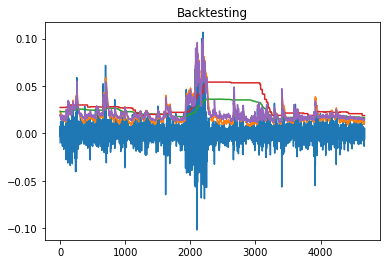

In [57]:
# Backtesting analysis in Python
# Listing 8.7/8.8
# Last updated July 2020
# 
#

W1 = WE # Python index starts at 0
m = ["EWMA", "MA", "HS", "GARCH"]

for i in range(4):
    VR = sum(y[W1:T] < -VaR[W1:T,i])/(p*(T-WE))
    s = np.std(VaR[W1:T, i], ddof=1)
    print (m[i], "\n", 
           "Violation ratio:", round(VR, 3), "\n", 
           "Volatility:", round(s,3), "\n")

plt.plot(y[W1:T])
plt.plot(VaR[W1:T])
plt.title("Backtesting")
plt.show()
plt.close()

In [58]:
# Bernoulli coverage test in Python
# Listing 8.9/8.10
# Last updated June 2018
# 
#
    
def bern_test(p,v):
    lv = len(v)
    sv = sum(v)
    
    al = np.log(p)*sv + np.log(1-p)*(lv-sv)
    bl = np.log(sv/lv)*sv + np.log(1-sv/lv)*(lv-sv)
    
    return (-2*(al-bl))

In [59]:
# Independence test in Python
# Listing 8.11/8.12
# Last updated June 2018
# 
#
    
def ind_test(V):
    J = np.full([T,4], 0)
    for i in range(1,len(V)-1):
        J[i,0] = (V[i-1] == 0) & (V[i] == 0)
        J[i,1] = (V[i-1] == 0) & (V[i] == 1)
        J[i,2] = (V[i-1] == 1) & (V[i] == 0)
        J[i,3] = (V[i-1] == 1) & (V[i] == 1)

    V_00 = sum(J[:,0])
    V_01 = sum(J[:,1])
    V_10 = sum(J[:,2])
    V_11 = sum(J[:,3])
    
    p_00=V_00/(V_00+V_01)
    p_01=V_01/(V_00+V_01)
    p_10=V_10/(V_10+V_11)
    p_11=V_11/(V_10+V_11)
    
    hat_p = (V_01+V_11)/(V_00+V_01+V_10+V_11)
    al = np.log(1-hat_p)*(V_00+V_10) + np.log(hat_p)*(V_01+V_11)
    bl = np.log(p_00)*V_00 + np.log(p_01)*V_01 + np.log(p_10)*V_10 + np.log(p_11)*V_11
    
    return (-2*(al-bl))

In [60]:
# Backtesting S&P 500 in Python
# Listing 8.13/8.14
# Last updated July 2020
# 
# 

W1 = WE
ya = y[W1:T]
VaRa = VaR[W1:T,]
m = ['EWMA', 'MA', 'HS', 'GARCH']

for i in range(4):
    q = y[W1:T] < -VaR[W1:T,i]
    v = VaRa*0
    v[q,i] = 1
    ber = bern_test(p, v[:,i])
    ind = ind_test(v[:,i])
    print (m[i], "\n",
           "Bernoulli:", "Test statistic =", round(ber,3), "p-value =", round(1 - stats.chi2.cdf(ber, 1),3), "\n",
           "Independence:", "Test statistic =", round(ind,3), "p-value =", round(1 - stats.chi2.cdf(ind, 1),3), "\n")

EWMA 
 Bernoulli: Test statistic = 41.626 p-value = 0.0 
 Independence: Test statistic = 0.441 p-value = 0.507 

MA 
 Bernoulli: Test statistic = 27.904 p-value = 0.0 
 Independence: Test statistic = 17.439 p-value = 0.0 

HS 
 Bernoulli: Test statistic = 2.535 p-value = 0.111 
 Independence: Test statistic = 11.483 p-value = 0.001 

GARCH 
 Bernoulli: Test statistic = 11.814 p-value = 0.001 
 Independence: Test statistic = 0.599 p-value = 0.439 



In [61]:
# Backtest ES in Python
# Listing 8.15/8.16
# Last updated July 2020
# 
#

VaR = np.full([T,2], np.nan) # VaR forecasts
ES = np.full([T,2], np.nan)  # ES forecasts
for t in range(WE, T):
    t1 = t - WE
    t2 = t - 1
    window = y[t1:t2+1]

    s11 = lmbda * s11 + (1-lmbda) * y[t-1]**2
    VaR[t,0] = -stats.norm.ppf(p) * np.sqrt(s11)*value       # EWMA
    ES[t,0]=np.sqrt(s11)*stats.norm.pdf(stats.norm.ppf(p))/p

    ys = np.sort(window)
    VaR[t,1] = -ys[l1 - 1] * value                           # HS
    ES[t,1] = -np.mean(ys[0:l1]) * value

In [62]:
# ES in Python
# Listing 8.17/8.18
# Last updated July 2020
# 
#

ESa = ES[W1:T,:]
VaRa = VaR[W1:T,:]
m = ["EWMA", "HS"]

for i in range(2):
    q = ya <= -VaRa[:,i]
    nES = np.mean(ya[q] / -ESa[q,i])
    print (m[i], 'nES = ', round(nES,3))

EWMA nES =  1.224
HS nES =  1.054


<a id='9'></a>
***

# Chapter 9: Extreme Value Theory

-  9.1/9.2: Calculation of tail index from returns

In [63]:
# Hill estimator in Python
# Listing 9.1/9.2
# Last updated June 2018
# 
#   

ysort = np.sort(y)                                # sort the returns
CT = 100                                          # set the threshold
iota = 1/(np.mean(np.log(ysort[0:CT]/ysort[CT]))) # get the tail index

print(iota) 

# END

2.62970984651441
